<div>
<img src=https://www.institutedata.com/wp-content/uploads/2019/10/iod_h_tp_primary_c.svg width="300">
</div>

## Lab 4.2.1: Feature Selection

### 1. Load & Explore Data

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')
%matplotlib inline

#### 1.1 Load Data

In [6]:
# Read CSV
df = pd.read_csv('../../../IOD/DATA/winequality_merged.csv')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,red_wine
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1


#### 1.2 Explore Data (Exploratory Data Analysis)

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  red_wine              6497 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 660.0 KB


In [33]:
df.shape

(6497, 13)

In [143]:
df.quality.value_counts()

quality
6    2836
5    2138
7    1079
4     216
8     193
3      30
9       5
Name: count, dtype: int64

In [144]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,6497.0,7.215307,1.296434,3.80000,6.40000,7.00000,7.70000,15.90000
volatile acidity,6497.0,0.339666,0.164636,0.08000,0.23000,0.29000,0.40000,1.58000
citric acid,6497.0,0.318633,0.145318,0.00000,0.25000,0.31000,0.39000,1.66000
residual sugar,6497.0,5.443235,4.757804,0.60000,1.80000,3.00000,8.10000,65.80000
chlorides,6497.0,0.056034,0.035034,0.00900,0.03800,0.04700,0.06500,0.61100
free sulfur dioxide,6497.0,30.525319,17.749400,1.00000,17.00000,29.00000,41.00000,289.00000
total sulfur dioxide,6497.0,115.744574,56.521855,6.00000,77.00000,118.00000,156.00000,440.00000
density,6497.0,0.994697,0.002999,0.98711,0.99234,0.99489,0.99699,1.03898
pH,6497.0,3.218501,0.160787,2.72000,3.11000,3.21000,3.32000,4.01000
sulphates,6497.0,0.531268,0.148806,0.22000,0.43000,0.51000,0.60000,2.00000


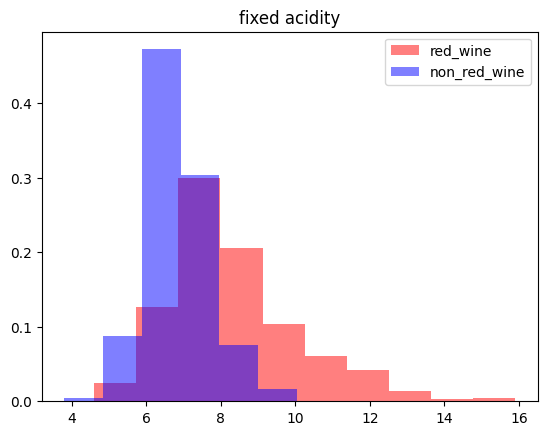

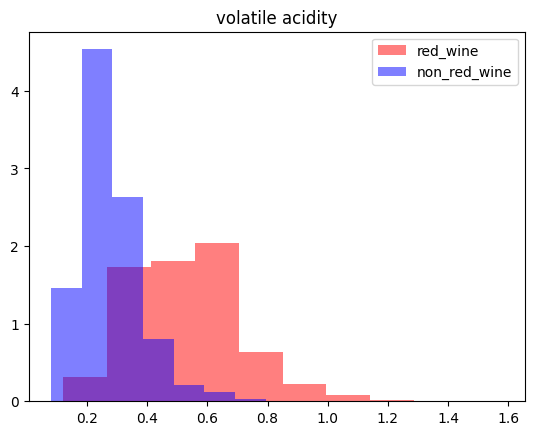

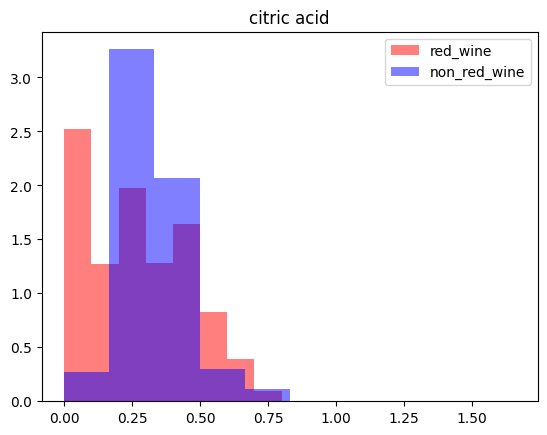

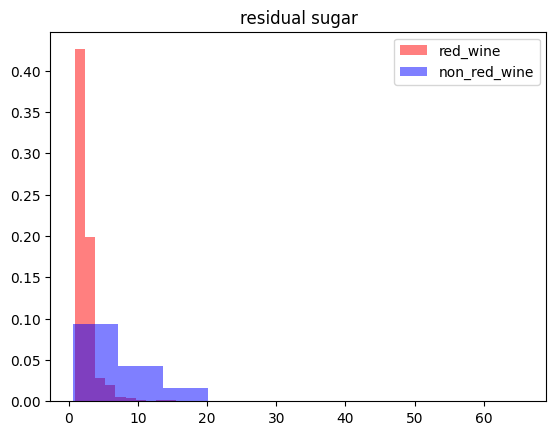

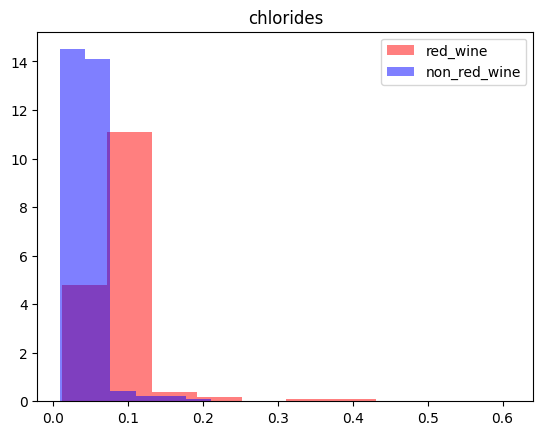

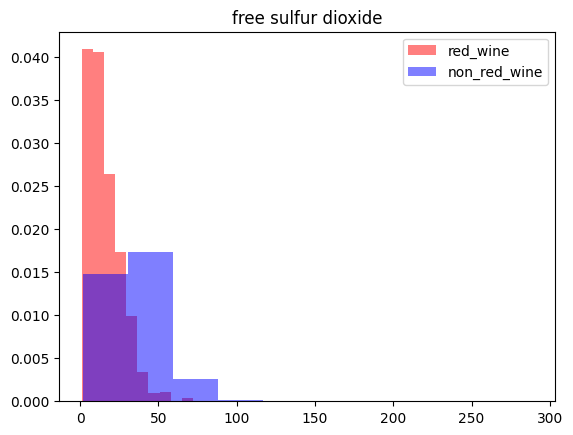

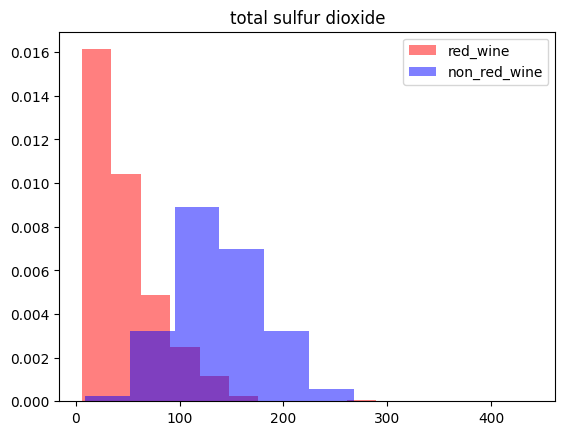

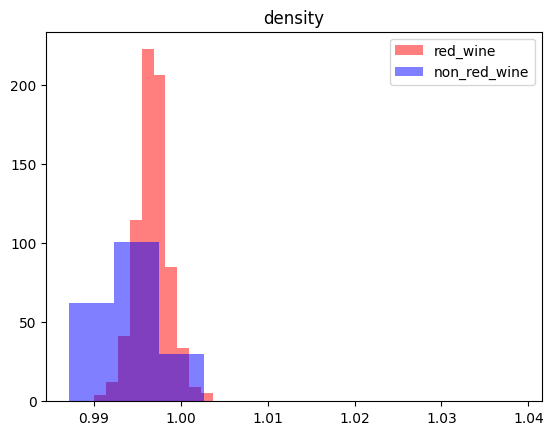

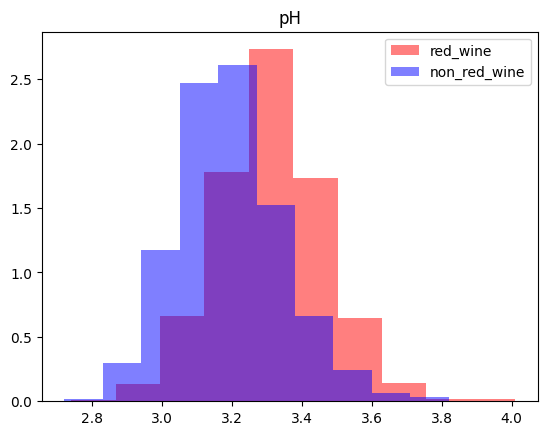

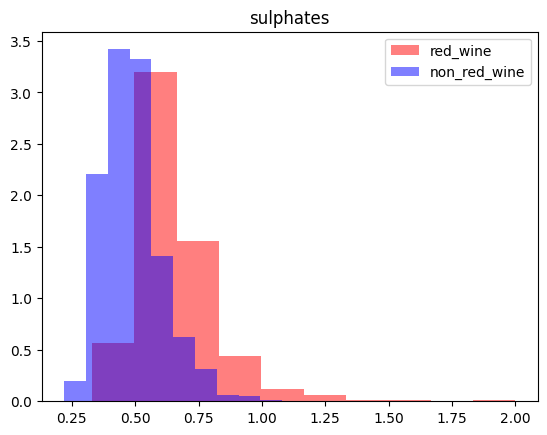

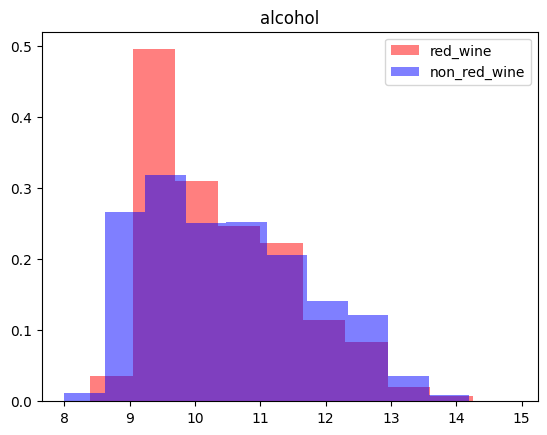

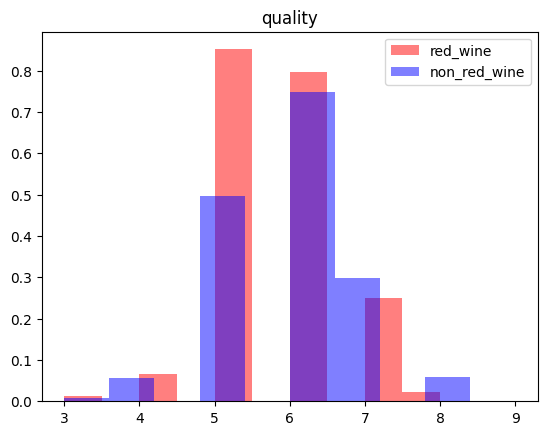

In [ ]:
for label in cols[:-1]:
    plt.hist(df[df['red_wine']==1][label], color='r', alpha=0.5, density=True, label='red_wine')
    plt.hist(df[df['red_wine']==0][label], color='b', alpha=0.5, density=True, label='non_red_wine')
    plt.title(label)
    plt.legend()
    plt.show()

In [40]:
df.head(1)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,red_wine
0,7.4,0.7,0.0,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1


In [74]:
# cols_to_plot = df.columns
# sns.pairplot(df, vars=cols_to_plot, hue='quality')
# plt.show()

In [88]:
# cols_to_plot = df.columns.drop(['red_wine', 'total sulfur dioxide', 'free sulfur dioxide', 'residual sugar', 'fixed acidity', 'alcohol', 'quality', 'pH'])
# sns.catplot(kind='box', data=df[cols_to_plot])
# plt.xticks(rotation=90)
# plt.show()

In [57]:
corr=df.corr()

<Axes: >

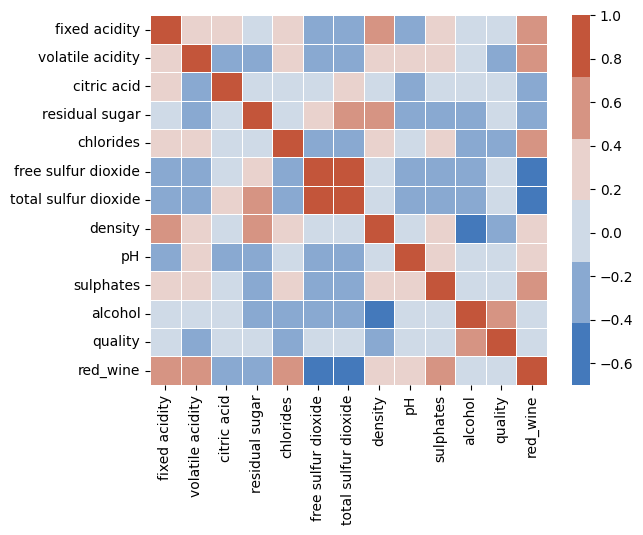

In [128]:
sns.heatmap(data=corr, cmap = sns.diverging_palette(250, 20), linewidths=0.6)

In [ ]:
### 2. Set Target Variable

Create a target variable for wine quality.

In [89]:
# Target Variable - quality

### 3. Set Predictor Variables

Create a predictor matrix with variables of your choice. State your reasoning for the choices you make.

In [138]:
# ANSWER - all but target
#Alternatively, volatile acidity, chlorides, density, alcohol, but lower r2

### 4. Using Linear Regression Create a Model and Test Score

In [139]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [157]:
# Train-Test Split
target = 'quality'
X = df.drop(target, axis=1)
# X = df[['volatile acidity', 'chlorides', 'density', 'alcohol']]
y = df[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [158]:
# Create a model for Linear Regression
reg = LinearRegression()

# Fit the model with the Training data
reg.fit(X_train, y_train)

# Calculate the score (R^2 for Regression) for Training Data
R2_training = reg.score(X_train, y_train)

# Calculate the score (R^2 for Regression) for Testing Data
R2_test = reg.score(X_test, y_test)

print(R2_training, R2_test)

0.3029447101867324 0.2671574851262567


## BONUS: Cross validation

In [142]:
# Cross validation
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error

In [168]:
# Set up 5-fold cross validation
k_fold = KFold(5, shuffle=True)
train_scores = []
train_rmse = []
test_scores = []
test_rmse = []

for k, (train, test) in enumerate(k_fold.split(X)):

    # Get training and test sets for X and y
    X_train = X.iloc[train, ]
    y_train = y.iloc[train, ]
    X_test = X.iloc[test, ]
    y_test = y.iloc[test, ]
    
    # Fit model with training set
    reg.fit(X_train, y_train)
    
    # Make predictions with training and test set
    train_preds = reg.predict(X_train)
    test_preds = reg.predict(X_test)
    
    # Score R2 and RMSE on training and test sets and store in list
    train_scores.append(reg.score(X_train, y_train))
    test_scores.append(reg.score(X_test, y_test))
    
    train_rmse.append(mean_squared_error(y_train, train_preds, squared=False))
    test_rmse.append(mean_squared_error(y_test, test_preds, squared=False))

# Create a metrics_df dataframe to display r2 and rmse scores
metrics_df = pd.DataFrame({'Training R2': train_scores, 
                           'Test R2': test_scores, 
                           'Training RMSE': train_rmse, 
                           'Test RMSE': test_rmse},
                          index=[i+1 for i in range(5)])

metrics_df

,Training R2,Test R2,Training RMSE,Test RMSE
1,0.301235,0.276878,0.728008,0.750237
2,0.297277,0.292146,0.736202,0.717232
3,0.295486,0.297890,0.734840,0.723571
4,0.297363,0.290576,0.727507,0.752475
5,0.292959,0.307932,0.734332,0.725864


In [170]:
# Describe the metrics

metrics_df.describe()

,Training R2,Test R2,Training RMSE,Test RMSE
count,5.000000,5.000000,5.000000,5.000000
mean,0.296864,0.293084,0.732178,0.733876
std,0.003028,0.011329,0.004096,0.016287
min,0.292959,0.276878,0.727507,0.717232
25%,0.295486,0.290576,0.728008,0.723571
50%,0.297277,0.292146,0.734332,0.725864
75%,0.297363,0.297890,0.734840,0.750237
max,0.301235,0.307932,0.736202,0.752475


In [177]:
from sklearn.model_selection import cross_val_score, cross_validate
kf=KFold(n_splits=5, shuffle=True)
#Use cross_validate instead of cross_val_score to return the training scores as well as the test scores)
cv_results = cross_validate(reg, X, y, cv=kf, return_train_score=True)
cv_results

{'fit_time': array([0.00598407, 0.00498438, 0.00850153, 0.00997329, 0.01396632]),
 'score_time': array([0.00299358, 0.00199533, 0.00398827, 0.01196718, 0.0039897 ]),
 'test_score': array([0.28431387, 0.27163516, 0.31741071, 0.30578671, 0.27692954]),
 'train_score': array([0.29899885, 0.30183817, 0.29002384, 0.29373218, 0.30041081])}

In [179]:
cv_df= pd.DataFrame(cv_results)
cv_df

,fit_time,score_time,test_score,train_score
0,0.005984,0.002994,0.284314,0.298999
1,0.004984,0.001995,0.271635,0.301838
2,0.008502,0.003988,0.317411,0.290024
3,0.009973,0.011967,0.305787,0.293732
4,0.013966,0.003990,0.276930,0.300411


In [183]:
print(cv_df.train_score.mean(),
cv_df.test_score.mean())

0.2970007702330699 0.29121519811254615


### 5. Feature Selection

What's your score (R^2 for Regression) for Testing Data?

How many feature have you selected? Can you improve your score by selecting different features?

**Please continue with Lab 4.2.2 with the same dataset.**



---



---



> > > > > > > > > © 2023 Institute of Data


---



---



